# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

### **Who, What, and How for the Data Story**

#### **Who**  
The audience for this data story is **team leads or executives in charge of customer retention initiatives**. This includes decision-makers responsible for allocating resources to reduce customer churn and those who rely on data-driven insights to make strategic decisions.

#### **What**  
The objective is to **highlight the key drivers of customer churn** and provide actionable recommendations. The goal is for the audience to **understand the reasons behind churn and approve predictive strategies or interventions** to mitigate it.

#### **How**  
Leverage historical customer data segmented by behavioral patterns, product usage, and demographics to create a compelling narrative. Use data visualizations and predictive modeling to emphasize critical insights, such as:
- **Churn Trends**: Use a line chart to show churn rates over time.
- **Key Drivers**: Highlight correlations between churn and specific factors (e.g., demographics, product usage) using heatmaps or bar charts.
- **Predictive Insights**: Demonstrate the effectiveness of a predictive churn model and simulate the impact of proposed interventions.

The combination of clear visuals and actionable insights will help the audience make informed decisions.


# 3. Homework - work with your own data

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import kagglehub
import os
import matplotlib.pyplot as plt


This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [9]:
# Download latest version
path = kagglehub.dataset_download("shubhammeshram579/bank-customer-churn-prediction")

print("Path to dataset files:", path)
dataset_path = "/home/codespace/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1"
print("Files in dataset directory:", os.listdir(dataset_path))

file_path = os.path.join(dataset_path, "Churn_Modelling.csv")  #
data = pd.read_csv(file_path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1
Files in dataset directory: ['Churn_Modelling.csv']


In [10]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [15]:
# check duplicates

dups = data.duplicated()
print(f"Number of duplicate rows: {dups.sum()}")

#Inappropriate as customer IDs should be unique
dups_customerid = data['CustomerId'].duplicated()
print(f"Number of duplicate customer ids: {dups_customerid.sum()}")

# Display duplicate rows
duplicate_rows = data[data.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)



Number of duplicate rows: 2
Number of duplicate customer ids: 2
Duplicate rows:
       RowNumber  CustomerId    Surname  CreditScore Geography  Gender   Age  \
9999        9999    15682355  Sabbatini          772   Germany    Male  42.0   
10001      10000    15628319     Walker          792    France  Female  28.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9999        3   75075.31              2        1.0             0.0   
10001       4  130142.79              1        1.0             0.0   

       EstimatedSalary  Exited  
9999          92888.52       1  
10001         38190.78       0  


In [21]:
# mean median and mode for nuemric columsn

mean_vals = data.mean(numeric_only=True)
median_vals = data.median(numeric_only=True)
mode_vals = data.mode().iloc[0]

print("Mean values:\n", mean_vals)
print("\nMedian values:\n", median_vals)
print("\nMode values:\n", mode_vals) #very unlikely to have mode values


Mean values:
 RowNumber          5.001500e+03
CustomerId         1.569093e+07
CreditScore        6.505551e+02
Age                3.892231e+01
Tenure             5.012498e+00
Balance            7.649111e+04
NumOfProducts      1.530194e+00
HasCrCard          7.055294e-01
IsActiveMember     5.149485e-01
EstimatedSalary    1.000833e+05
Exited             2.037592e-01
dtype: float64

Median values:
 RowNumber              5001.50
CustomerId         15690732.00
CreditScore             652.00
Age                      37.00
Tenure                    5.00
Balance               97198.54
NumOfProducts             1.00
HasCrCard                 1.00
IsActiveMember            1.00
EstimatedSalary      100185.24
Exited                    0.00
dtype: float64

Mode values:
 RowNumber              9999.0
CustomerId         15628319.0
Surname                 Smith
CreditScore             850.0
Geography              France
Gender                   Male
Age                      37.0
Tenure               

In [22]:
# check for missing or null vals

missing_vals = data.isnull().sum()
print("\nMissing values per column:\n", missing_vals)



Missing values per column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [26]:
# Drop missing vals:
data.dropna(inplace=True)
missing_vals = data.isnull().sum()
print("\nMissing values per column:\n", missing_vals)



Missing values per column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [28]:
#Check for inconsisten vals:

negative_values = data[(data['Balance'] < 0) | (data['Age'] < 0)]
print("\nRows with negative values:\n", negative_values)

# Check for ages over 120 (unlikely in this context)
unrealistic_ages = data[data['Age'] > 120]
print("\nRows with unrealistic ages:\n", unrealistic_ages)


Rows with negative values:
 Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

Rows with unrealistic ages:
 Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [30]:
# encode geography and gender

data_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
print("\nData after encoding:\n", data_encoded.head())
print("Final dataset shape:", data_encoded.shape)



Data after encoding:
    RowNumber  CustomerId   Surname  CreditScore   Age  Tenure    Balance  \
0          1    15634602  Hargrave          619  42.0       2       0.00   
1          2    15647311      Hill          608  41.0       1   83807.86   
2          3    15619304      Onio          502  42.0       8  159660.80   
3          4    15701354      Boni          699  39.0       1       0.00   
5          6    15574012       Chu          645  44.0       8  113755.78   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1        1.0             1.0        101348.88       1   
1              1        0.0             1.0        112542.58       0   
2              3        1.0             0.0        113931.57       1   
3              2        0.0             0.0         93826.63       0   
5              2        1.0             0.0        149756.71       1   

   Geography_Germany  Geography_Spain  Gender_Male  
0              False            Fa

### Is the Data Usable?
- Yes, the final dataset has a shape of `(9998, 15)` with no missing values, and all categorical values have been encoded.

### Do You Need to Modify or Correct the Data?
- Further modifications or corrections may be necessary depending on the specific question being addressed.
  - If we focus on churn prediction, we might prioritize features that correlate strongly with the `Exited` column.
  - Additional feature engineering may be needed, such as combining or encoding features, based on the requirements of the analysis.


In [31]:
# Check class distribution for target variable
class_counts = data_encoded['Exited'].value_counts()
print("\nClass distribution:\n", class_counts)

# Class percentages
class_percentages = class_counts / len(data_encoded) * 100
print("\nClass percentages:\n", class_percentages)



Class distribution:
 Exited
0    7960
1    2038
Name: count, dtype: int64

Class percentages:
 Exited
0    79.615923
1    20.384077
Name: count, dtype: float64


### Class Imbalance?
- There is a noticeable class imbalance, with **79.6% of customers not exiting** and only **20.4% exiting**. This imbalance might need to be addressed depending on the analysis goals

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

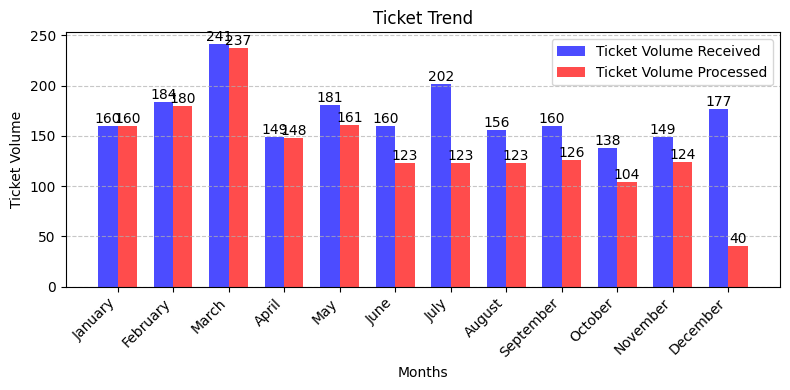

In [38]:
# data entries
months = ["January", "February", "March", "April", "May", "June", "July", "August", 
          "September", "October", "November", "December"]
ticket_received = [160, 184, 241, 149, 181, 160, 202, 156, 160, 138, 149, 177]
ticket_processed = [160, 180, 237, 148, 161, 123, 123, 123, 126, 104, 124, 40]
bar_width = 0.35
x = np.arange(len(months))
fig, ax = plt.subplots(figsize=(8,4))

bars1 = ax.bar(x - bar_width/2, ticket_received, bar_width, label="Ticket Volume Received", color='blue', alpha=0.7)
bars2 = ax.bar(x + bar_width/2, ticket_processed, bar_width, label="Ticket Volume Processed", color='red', alpha=0.7)

for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{int(bar.get_height())}", 
            ha='center', va='bottom', fontsize=10, color='black')

for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{int(bar.get_height())}", 
            ha='center', va='bottom', fontsize=10, color='black')
ax.set_xlabel("Months")
ax.set_ylabel("Ticket Volume")
ax.set_title("Ticket Trend")
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45, ha="right")  
ax.legend()

ax.yaxis.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

